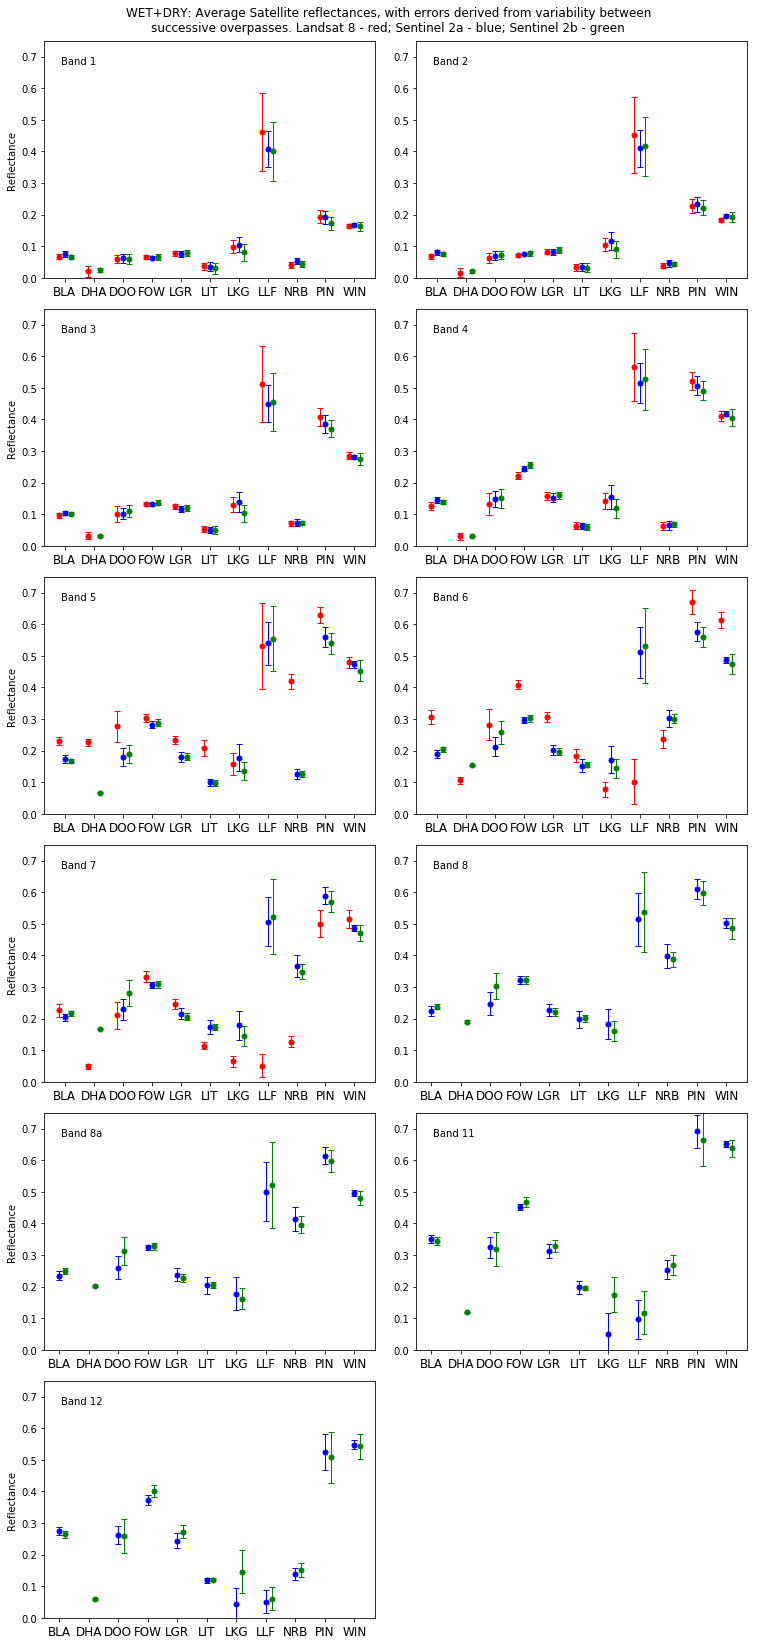

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
sites = ['BLA', 'DHA', 'DOO', 'FOW', 'LGR', 'LIT', 'LKG', 'LLF', 'NRB', 'PIN', 'WIN']
srs = pd.read_csv('CSV/TimeStats/WORKING/SRs.csv')
srs.set_index('BAND', inplace=True)
diffs = pd.read_csv('CSV/TimeStats/WORKING/diffs.csv')
diffs.set_index('BAND', inplace=True)

bands = {0: 1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:8, 8:'8a', 9:11, 10:12}

pos = list(range(len(sites))) 
width = 0.2 

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12.0, 24.0))
fig.suptitle('WET+DRY: Average Satellite reflectances, with errors derived from variability between\nsuccessive overpasses. Landsat 8 - red; Sentinel 2a - blue; Sentinel 2b - green')
plt.tight_layout(pad=6.5, w_pad=1.0, h_pad=1.0)


for j in [0,1]:
    for i in [0,1,2,3,4,5]:
        if 2*i+j < 11:
            if j%2==0:
                axes[i,j].set_ylabel('Reflectance')
            #for tick in axes[i,j].get_xticklabels():
            #    tick.set_rotation(90)

            axes[i,j].set_ylim([0, 0.75])
            axes[i,j].tick_params(axis='x', which='both', labelsize=12)
                
            axes[i,j].text(0.05, 0.90, 'Band '+str(bands[2*i+j]), transform=axes[i,j].transAxes)
            axes[i,j].set_xticklabels(sites)
            axes[i,j].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])

            axes[i,j].errorbar(x=[p - width for p in pos], y=srs.loc['band'+str(bands[2*i+j])].filter(like='ls8_wet'), 
                            yerr=diffs.loc['band'+str(bands[2*i+j])].filter(like='ls8_wet'),
                            fmt='o', color='red', mfc='red', mec='red', capsize=3, linewidth=1.0, markersize=5)

            axes[i,j].errorbar(x=pos, y=srs.loc['band'+str(bands[2*i+j])].filter(like='s2a_wet'), 
                            yerr=diffs.loc['band'+str(bands[2*i+j])].filter(like='s2a_wet'),
                            fmt='o', color='blue', mfc='blue', mec='blue', capsize=3, linewidth=1.0, markersize=5)

            axes[i,j].errorbar(x=[p + width for p in pos], y=srs.loc['band'+str(bands[2*i+j])].filter(like='s2b_wet'), 
                            yerr=diffs.loc['band'+str(bands[2*i+j])].filter(like='s2b_wet'),
                            fmt='o', color='green', mfc='green', mec='green', capsize=3, linewidth=1.0, markersize=5)
        else:
            continue
if i > 3:
    axes[5,1].axis('off')
plt.savefig('site_avgs_wet.png', dpi=300)



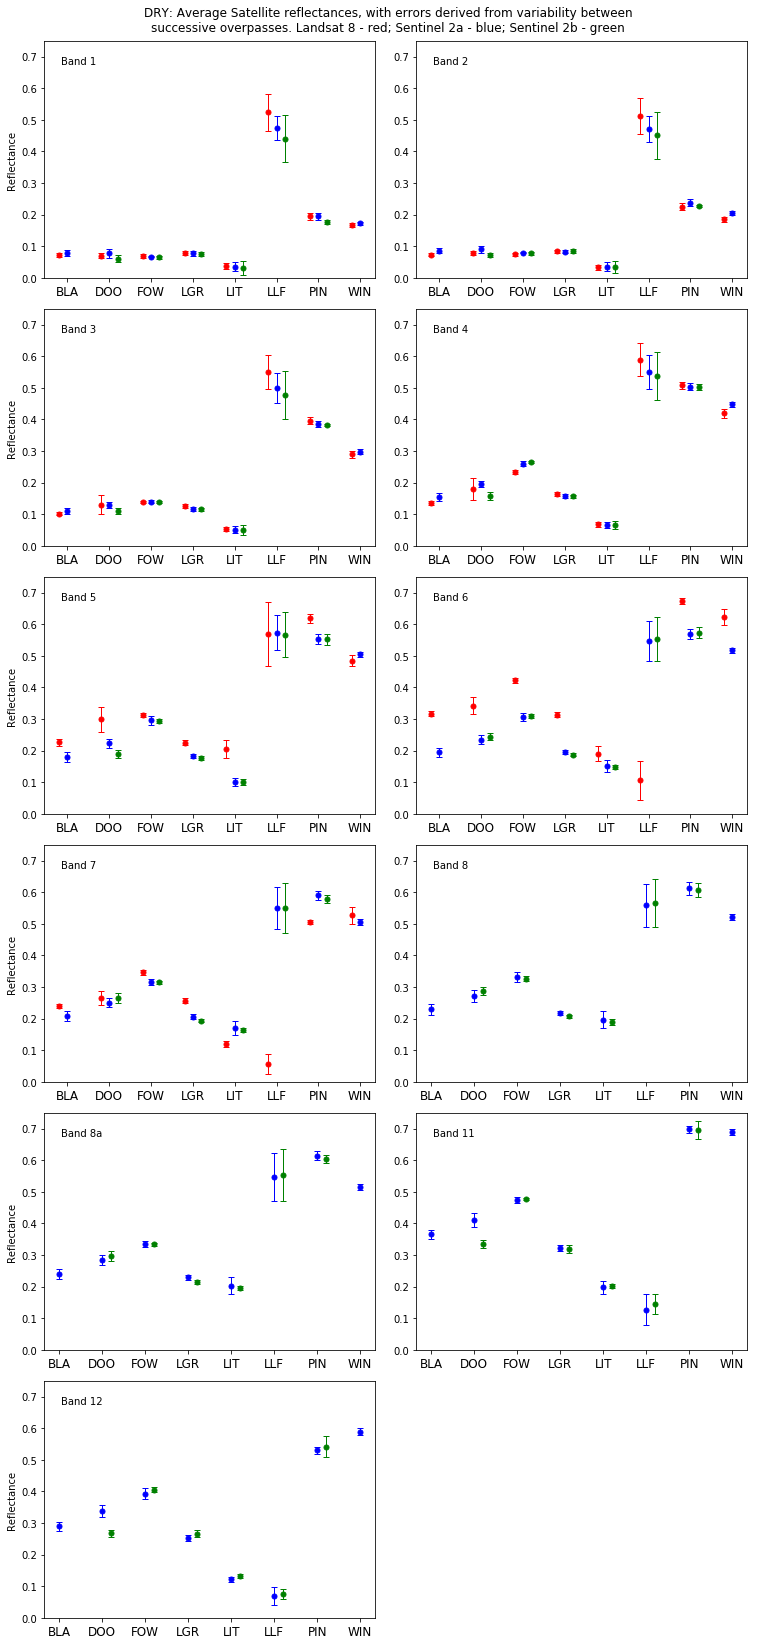

In [38]:
sites = ['BLA', 'DOO', 'FOW', 'LGR', 'LIT', 'LLF', 'PIN', 'WIN']
bands = {0: 1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:8, 8:'8a', 9:11, 10:12}

pos = list(range(len(sites))) 
width = 0.2 

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12.0, 24.0))
fig.suptitle('DRY: Average Satellite reflectances, with errors derived from variability between\nsuccessive overpasses. Landsat 8 - red; Sentinel 2a - blue; Sentinel 2b - green')
plt.tight_layout(pad=6.5, w_pad=1.0, h_pad=1.0)


for j in [0,1]:
    for i in [0,1,2,3,4,5]:
        if 2*i+j < 11:
            if j%2==0:
                axes[i,j].set_ylabel('Reflectance')
            #for tick in axes[i,j].get_xticklabels():
            #    tick.set_rotation(90)

            axes[i,j].set_ylim([0, 0.75])
            axes[i,j].tick_params(axis='x', which='both', labelsize=12)
                
            axes[i,j].text(0.05, 0.90, 'Band '+str(bands[2*i+j]), transform=axes[i,j].transAxes)
            axes[i,j].set_xticklabels(sites)
            axes[i,j].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])

            axes[i,j].errorbar(x=[p - width for p in pos], y=srs.loc['band'+str(bands[2*i+j])].filter(like='ls8_dry'), 
                            yerr=diffs.loc['band'+str(bands[2*i+j])].filter(like='ls8_dry'),
                            fmt='o', color='red', mfc='red', mec='red', capsize=3, linewidth=1.0, markersize=5)

            axes[i,j].errorbar(x=pos, y=srs.loc['band'+str(bands[2*i+j])].filter(like='s2a_dry'), 
                            yerr=diffs.loc['band'+str(bands[2*i+j])].filter(like='s2a_dry'),
                            fmt='o', color='blue', mfc='blue', mec='blue', capsize=3, linewidth=1.0, markersize=5)

            axes[i,j].errorbar(x=[p + width for p in pos], y=srs.loc['band'+str(bands[2*i+j])].filter(like='s2b_dry'), 
                            yerr=diffs.loc['band'+str(bands[2*i+j])].filter(like='s2b_dry'),
                            fmt='o', color='green', mfc='green', mec='green', capsize=3, linewidth=1.0, markersize=5)
        else:
            continue
if i > 3:
    axes[5,1].axis('off')
plt.savefig('site_avgs_dry.png', dpi=300)


In [36]:
diffs.filter(like='dry').columns

Index(['BLA_ls8_dry_Diff', 'BLA_s2a_dry_Diff', 'BLA_s2b_dry_Diff',
       'DOO_ls8_dry_Diff', 'DOO_s2a_dry_Diff', 'DOO_s2b_dry_Diff',
       'FOW_ls8_dry_Diff', 'FOW_s2a_dry_Diff', 'FOW_s2b_dry_Diff',
       'LGR_ls8_dry_Diff', 'LGR_s2a_dry_Diff', 'LGR_s2b_dry_Diff',
       'LIT_ls8_dry_Diff', 'LIT_s2a_dry_Diff', 'LIT_s2b_dry_Diff',
       'LLF_ls8_dry_Diff', 'LLF_s2a_dry_Diff', 'LLF_s2b_dry_Diff',
       'PIN_ls8_dry_Diff', 'PIN_s2a_dry_Diff', 'PIN_s2b_dry_Diff',
       'WIN_ls8_dry_Diff', 'WIN_s2a_dry_Diff', 'WIN_s2b_dry_Diff'],
      dtype='object')